# Clustering Jerárquico y Dendogramas
 
- X dataset(array de nxm) de puntos a clusterizar.
- n número de datos.
- m número de rasgos.
- Z array de enlace del cluster con la información de las uniones.
- k número de clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
from mpl_toolkits import mplot3d
np.random.seed(4711)

In [2]:
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=100)
#[10,0] # Media en X y Y (Covarianza)
#[3,1] # Disterpersión en X y Y para primer distribución
# This geometrical property can be seen in two dimensions by plotting
#generated data-points:

#>>> mean = [0, 0]
#>>> cov = [[1, 0], [0, 100]]  # diagonal covariance
#Diagonal covariance means that points are oriented along x or y-axis:

# Si es [100,1] entonces[[[n,r]],[[f,d]]] 
# (las letras son cualquier número dentro de la distribución acordada)
# Distribución normal, pero en varias dimensiones
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=50)
x = np.concatenate([a,b])
x.shape

(150, 2)

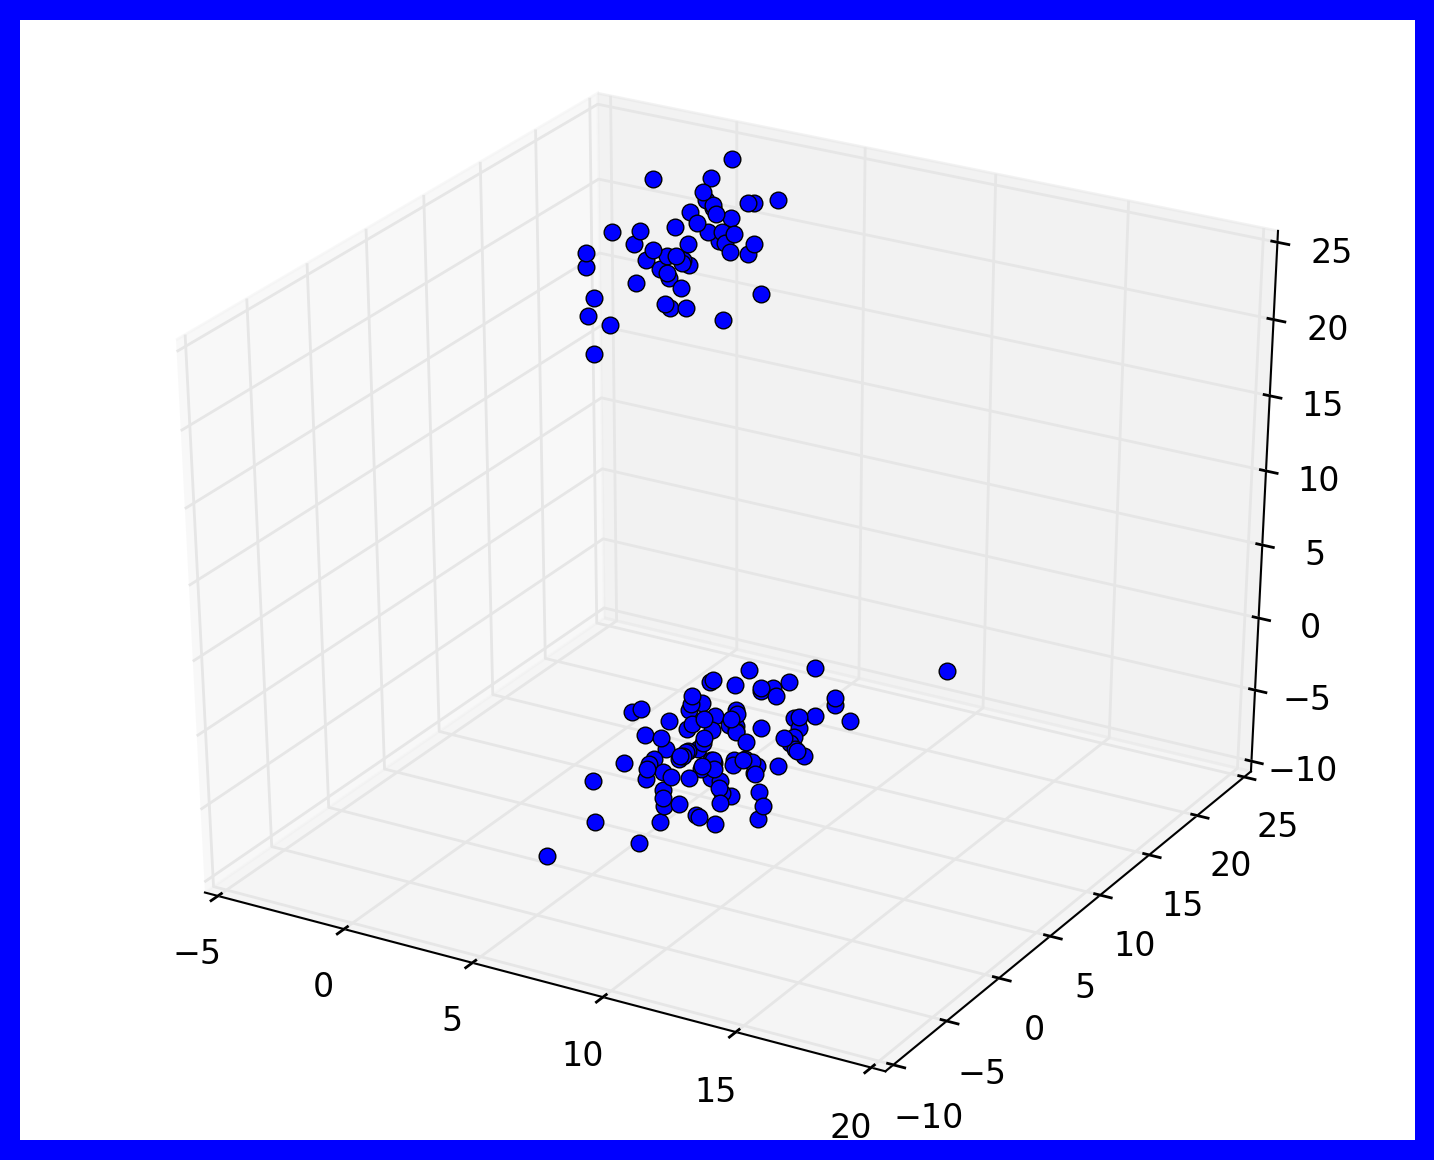

In [3]:
style.use("classic")
r=np.exp(-(x[:,0])) 
plt.figure(figsize=(9,7),facecolor="blue",edgecolor="red",
    frameon=True,dpi=200)
ax = plt.subplot(projection="3d")
ax.plot(x[:,0],x[:,1],x[:,1],"o")

In [4]:
Z = hierarchy.linkage(x,method='ward', metric='euclidean')
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [5]:
len(Z)

149

In [6]:
from scipy.cluster.hierarchy import cophenet #Comparar las distancias dos a dos con las realizadas por el cluster
from scipy.spatial.distance import pdist
?pdist

In [7]:
xx= np.array([[1,3],[4,6]])
pdist(x,"euclidean")

array([0.37304753, 3.47269689, 1.73844387, ..., 0.87899698, 0.9313283 ,
       0.81818881])

In [8]:
xx= np.array([[1,3],[4,6]])
pdist(x,"minkowski",p=2)

array([0.37304753, 3.47269689, 1.73844387, ..., 0.87899698, 0.9313283 ,
       0.81818881])

In [9]:
len(hierarchy.cophenet(Z))

11175

In [10]:
len(Z)*len(x[:,0])/2 # Se divide entre dos porque la distancias es de 2 valores.

11175.0

In [11]:
c, coph_dist = hierarchy.cophenet(Z,pdist(x))
# Mientras más se acerque (C) a uno será más efectiva.
c, coph_dist

(0.9800148387574268,
 array([ 1.49619316, 23.12198936,  6.44511711, ...,  0.85438969,
         1.7940741 ,  1.7940741 ]))

In [12]:
len(coph_dist)

11175

In [13]:
Z.shape # #id1,id2,d, n_elementos_cluster

(149, 4)

In [14]:
Z[0],Z[1]

(array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00]),
 array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00]))

In [15]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [16]:
print(Z[152-len(x)]) # Cluster 152. # Junta el 33 y el 68 con el que aparece en la tabla que es el 62. Esto ya es un cluster de 3 y no de 2
print(Z[158-len(x)]) # Cluster No. 8

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [17]:
x[[33,68,69]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 8.69529949, -0.62048946]])

In [18]:
len(Z)

149

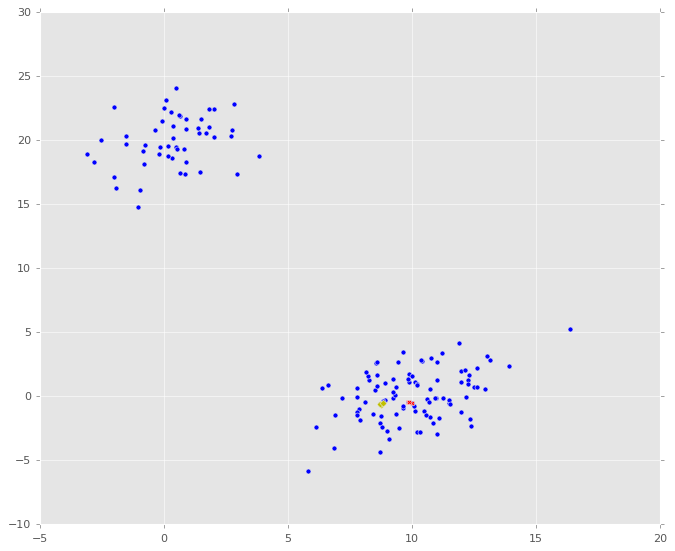

In [19]:
from matplotlib import style
idx = [33,62,68]
idx2 = [15,69,41]
style.use("ggplot")
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1])
plt.scatter(x[idx,0],x[idx,1],c="r", marker="X")
plt.scatter(x[idx2,0],x[idx2,1],c="y",marker="D")
plt.show()

## Representación gráfica de un dendograma

#?dendrogram

**Return**

-------------
R : dict
    A dictionary of data structures computed to render the
    dendrogram. Its has the following keys:

    ``'color_list'``
      A list of color names. The k'th element represents the color of the
      k'th link.

    ``'icoord'`` and ``'dcoord'``
      Each of them is a list of lists. Let ``icoord = [I1, I2, ..., Ip]``
      where ``Ik = [xk1, xk2, xk3, xk4]`` and ``dcoord = [D1, D2, ..., Dp]``
      where ``Dk = [yk1, yk2, yk3, yk4]``, then the k'th link painted is
      ``(xk1, yk1)`` - ``(xk2, yk2)`` - ``(xk3, yk3)`` - ``(xk4, yk4)``.

    ``'ivl'``
      A list of labels corresponding to the leaf nodes.

    ``'leaves'``
      For each i, ``H[i] == j``, cluster node ``j`` appears in position
      ``i`` in the left-to-right traversal of the leaves, where
      :math:`j < 2n-1` and :math:`i < n`. If ``j`` is less than ``n``, the
      ``i``-th leaf node corresponds to an original observation.
      Otherwise, it corresponds to a non-singleton cluster.

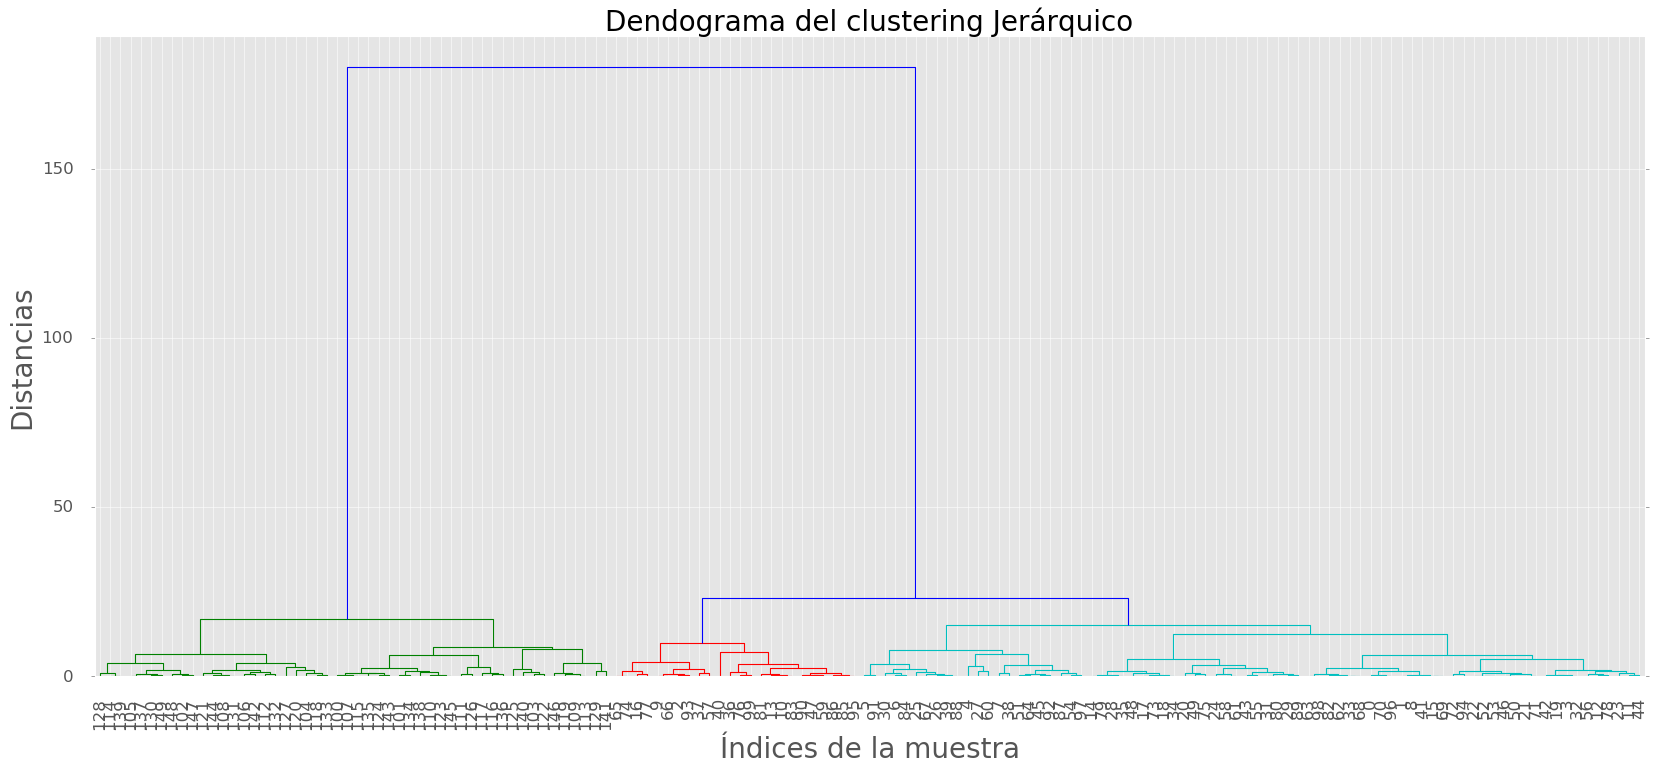

In [20]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering Jerárquico",size=25)
plt.xlabel("Índices de la muestra", size="25")
plt.ylabel("Distancias",size=25)
dendrogram(Z = Z, leaf_font_size=9, leaf_rotation=90,color_threshold=20,orientation="top")
 # color_threshold la representación de colores que vemos con relación a la distancia
plt.tick_params(axis='both', which='major', labelsize=15, pad=15)
plt.show()

In [21]:
Z[-4:,] 
# La cuarta columna es el número de elementos unidos, el tercero la distancia
# El segundo y el primero los clusters unidos

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

# Trucar el dendrograma

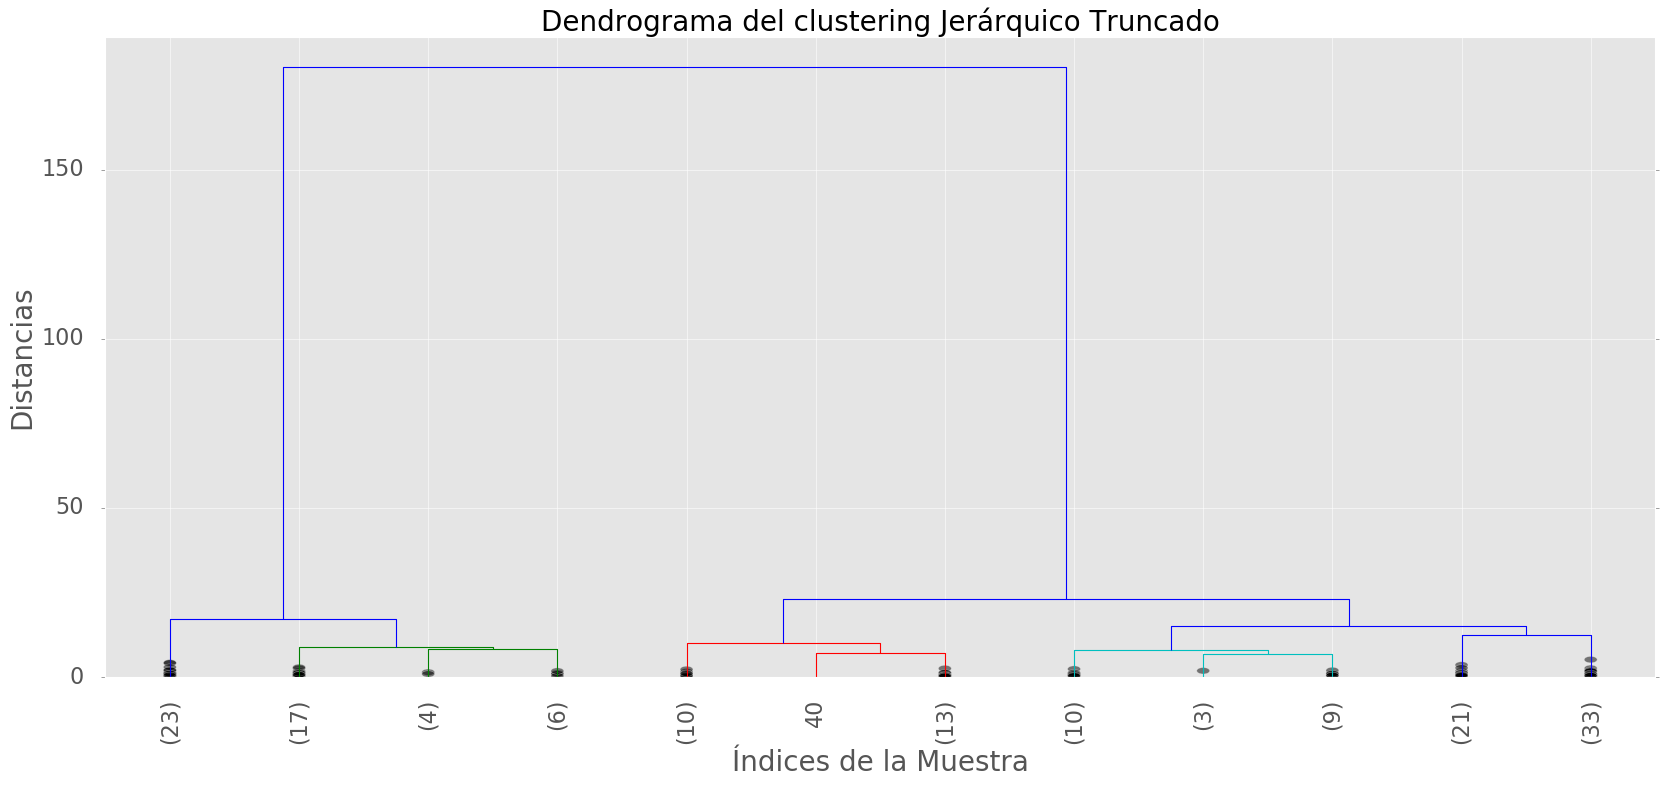

In [22]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering Jerárquico Truncado",size=25)
plt.xlabel("Índices de la Muestra",size=25)
plt.ylabel("Distancias",size=25)
dendrogram(Z, leaf_font_size=8,leaf_rotation=90,color_threshold=10,truncate_mode="lastp",
           #('lastp', 'mlab', 'mtica', 'level', 'none', None):
          p=12,show_leaf_counts=True,show_contracted=True)
# Sirve para poner las bolitas de abajo
# Mostrar los últimos p clusters unidos 
# Show leaf counts el numero de cluster por clasificación
plt.tick_params(axis='both', which='major', labelsize=20, pad=15)
plt.show()

## Dendrograma Tuneado

In [23]:
def dendrogram_tune(*args,**kwargs):
    plt.figure(figsize=(10,8))
    max_d = kwargs.pop("max_d",None)  # Se lo borra a un diccionario y si no lo encuentra no regresa nada
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d # lo indexas en el diccionario
    annotate_above = kwargs.pop("annotate_above",0) # Se elimina
    
    ddata = dendrogram(*args,**kwargs)
    # Quita el argumento max_d de los parámetros
    
    if not kwargs.get("no_plot",False):
        plt.title("Clustering jerárquico con Dendrograma truncado",size=25)
        plt.xlabel("Índice del Dataset",size=25)
        plt.ylabel("Distancias",size=25)
        for i,d,c in zip(ddata["icoord"], ddata["dcoord"],ddata["color_list"]):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,"o",c = c)
                plt.annotate("%.3g"%y,(x,y),xytext = (10,-5),
                             textcoords = "offset points", va="top",ha="right") # Horizontal alignment
                
    if max_d:
        plt.axhline(y = max_d,c="k")
    return ddata,kwargs

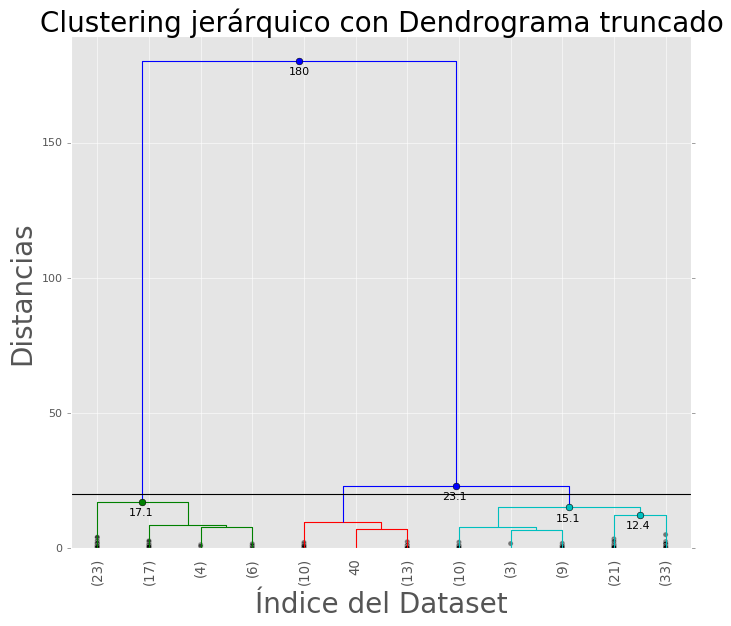

In [24]:
dendo = dendrogram_tune(Z,truncate_mode='lastp',p=12,leaf_rotation=90,leaf_font_size=12,show_contracted= True,
               annotate_above=10,max_d=20)
plt.show()

In [25]:
ddata= dendo[0]
for i,d,c in zip(ddata["icoord"], ddata["dcoord"],ddata["color_list"]):
    f = 0.5*sum(i[1:3])
    y = d[1]
    if y>10:
        print(y)

    # print(c) # color

17.11527361712349
12.42734657224792
15.115331182663091
23.121989355286757
180.27043021047612


In [26]:
dendo[1]

{'truncate_mode': 'lastp',
 'p': 12,
 'leaf_rotation': 90,
 'leaf_font_size': 12,
 'show_contracted': True,
 'color_threshold': 20}

In [27]:
dendo

({'icoord': [[25.0, 25.0, 35.0, 35.0],
   [15.0, 15.0, 30.0, 30.0],
   [5.0, 5.0, 22.5, 22.5],
   [55.0, 55.0, 65.0, 65.0],
   [45.0, 45.0, 60.0, 60.0],
   [85.0, 85.0, 95.0, 95.0],
   [75.0, 75.0, 90.0, 90.0],
   [105.0, 105.0, 115.0, 115.0],
   [82.5, 82.5, 110.0, 110.0],
   [52.5, 52.5, 96.25, 96.25],
   [13.75, 13.75, 74.375, 74.375]],
  'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
   [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
   [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
   [0.0, 7.11106083424195, 7.11106083424195, 0.0],
   [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
   [0.0, 6.65621608856717, 6.65621608856717, 0.0],
   [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
   [0.0, 12.42734657224792, 12.42734657224792, 0.0],
   [7.868785423127422,
    15.115331182663091,
    15.115331182663091,
    12.42734657224792],
   [9.844278294486319,
    23.121989355286757,
    23.121989355286757,
    15.1

### Corto automático del Dendrograma

$$incosistency = (h_i - avg(h_i))/std(hj$$

In [28]:
from scipy.cluster.hierarchy import inconsistent
# Calculate inconsistency statistics on a linkage matrix.

In [29]:
deepth = 3
incos = inconsistent(Z,deepth)
# Saltos muy grandes donde se genera una incosistencia
incos

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

## Método del Codo

In [30]:
last = Z[-15:,2]
last_rev = last[::-1]
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083,   6.65621609,   6.59359584,
         6.44511711,   6.20388183,   5.31022757])

In [31]:
idx = np.arange(1,len(last)+1)
# Graficaremos diferencias de las diferencias para corroborar la intensidad del cambio
acc = np.diff(last_rev)
acc

array([-1.57148441e+02, -6.00671574e+00, -1.99994243e+00, -2.68798461e+00,
       -2.58306828e+00, -1.09605555e+00, -6.98869924e-01, -1.80567400e-01,
       -7.57724589e-01, -4.54844746e-01, -6.26202521e-02, -1.48478728e-01,
       -2.41235283e-01, -8.93654256e-01])

In [32]:
acc = np.diff(last,2) # Dos diferencias
acc

array([-6.52418973e-01, -9.27565551e-02, -8.58584755e-02,  3.92224494e-01,
        3.02879843e-01, -5.77157189e-01,  5.18302524e-01,  3.97185622e-01,
        1.48701273e+00,  1.04916333e-01, -6.88042176e-01,  4.00677330e+00,
        1.51141725e+02])

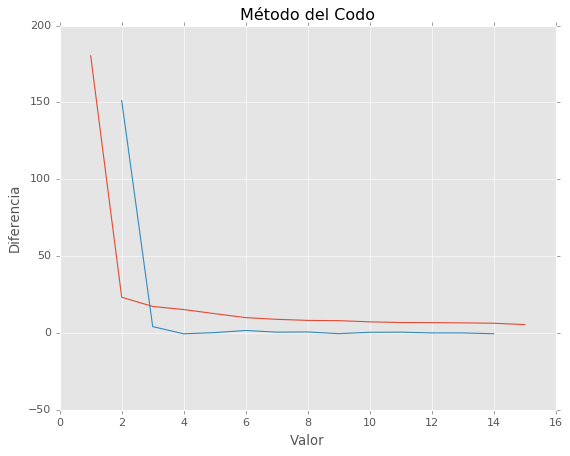

In [33]:
plt.plot(idx,last_rev)
plt.title("Método del Codo")
plt.xlabel("Valor")
plt.ylabel("Diferencia")

acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
k = acc_rev.argmax()+2 # argmax Returns the indices of the maximum values along an axis.

plt.show()

In [34]:
print('Por lo tanto, el numero de Clusters óptimos es : %d'%k) 

Por lo tanto, el numero de Clusters óptimos es : 2


In [35]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size= [200])
x2 = np.concatenate([x,c,d,e])

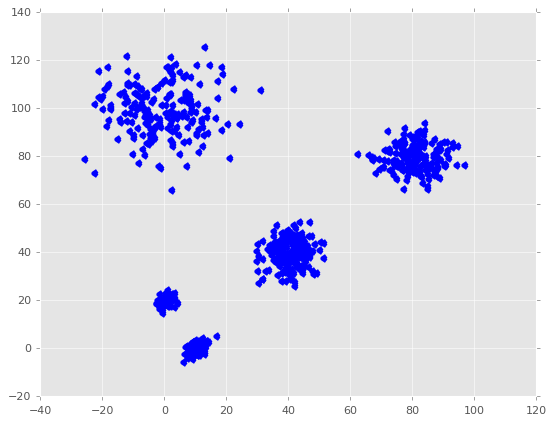

In [36]:
plt.scatter(x2[:,0],x2[:,1],marker=4,linewidth=4)
plt.show()

In [37]:
z2 = linkage(x2,"ward")

<Figure size 800x640 with 0 Axes>

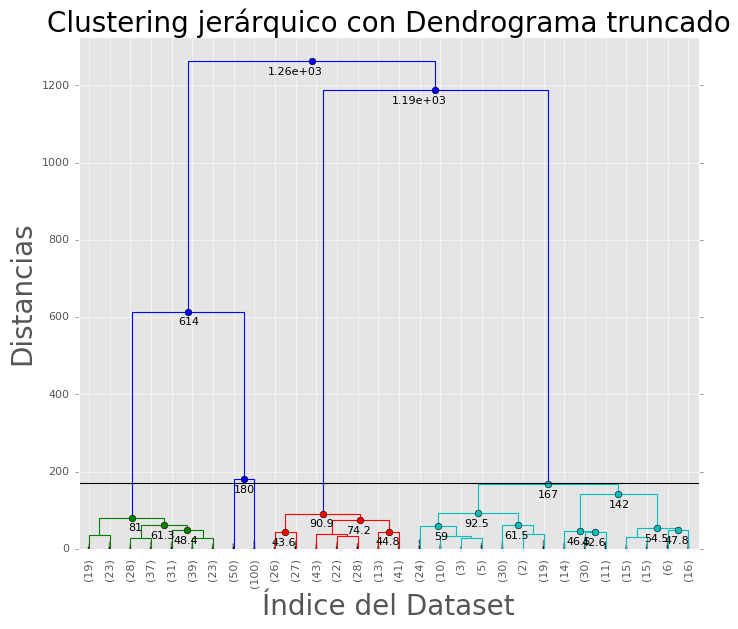

In [38]:
plt.figure(figsize=(10,8))
dendrogram_tune(z2,truncate_mode = "lastp",p=30,leaf_rotation = 90,leaf_font_size=10,
                show_contracted = True, annotate_above = 40, max_d=170)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312
   61.50498427   61.30415198   59.00859748   54.53911742   48.44356202]

 
Por lo tanto, el Número de Cluster óptimo es : 4


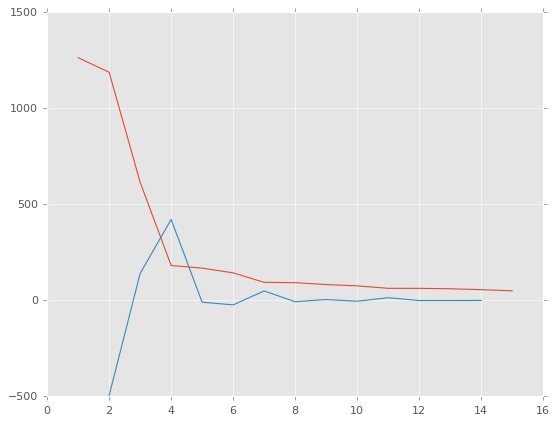

In [39]:
last = z2[-15:,2]
last_rev= last[::-1]
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
print(last_rev)

# Diferencias
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
k = acc_rev.argmax()+2 # Suma dos porque fueron 2 diferencias
print("\n \nPor lo tanto, el Número de Cluster óptimo es : %d"%k)
plt.show()

In [40]:
print(inconsistent(z2,5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


In [41]:
z2

array([[4.70000000e+02, 5.20000000e+02, 4.00641808e-02, 2.00000000e+00],
       [5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       ...,
       [1.49000000e+03, 1.49500000e+03, 6.14065047e+02, 3.50000000e+02],
       [1.49100000e+03, 1.49400000e+03, 1.18675882e+03, 4.00000000e+02],
       [1.49600000e+03, 1.49700000e+03, 1.26252131e+03, 7.50000000e+02]])

$$ \frac{\mathtt{Z[i,2]} - \mathtt{R[i,0]}} {R[i,1]}$$

## Recuperar los Cluster y sus elementosm

In [42]:
from scipy.cluster.hierarchy import fcluster
# Form flat clusters from the hierarchical clustering defined by
# the given linkage matrix.

In [43]:
max_d  = 23 # Altura del Cluster para tomar en cuenta
cluster = fcluster(Z,max_d , criterion="distance")
# Es un array con 150 elementos. Uno para cada indice o entrada del dataset 
#específicando si debería ir en el cluster 3,2 o 1.

In [44]:
cluster

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
# Otro modo puede ser no por distancia
#       ``distance`` : 
#          Forms flat clusters so that the original
#          observations in each flat cluster have no greater a
#          cophenetic distance than `t`.
#       ``maxclust`` : 
#          Finds a minimum threshold ``r`` so that
#          the cophenetic distance between any two original
#          observations in the same flat cluster is no more than
#          ``r`` and no more than `t` flat clusters are formed.
?fcluster

In [46]:
k = 2
clusters = fcluster(Z,k,criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
sum(cluster==clusters)
 # En este caso son iguales con la k o por la distancia.

74

In [48]:
# También se puede haacer por el método de la inconsistencia
clusters_ = fcluster(Z,8 , depth=10)
clusters_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

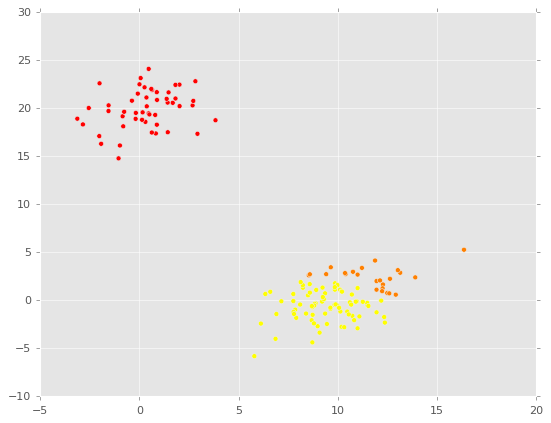

In [49]:
plt.scatter(x[:,0],x[:,1], c=cluster, cmap="autumn")
plt.show()

# Todos los colores disponibles son:
 - Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

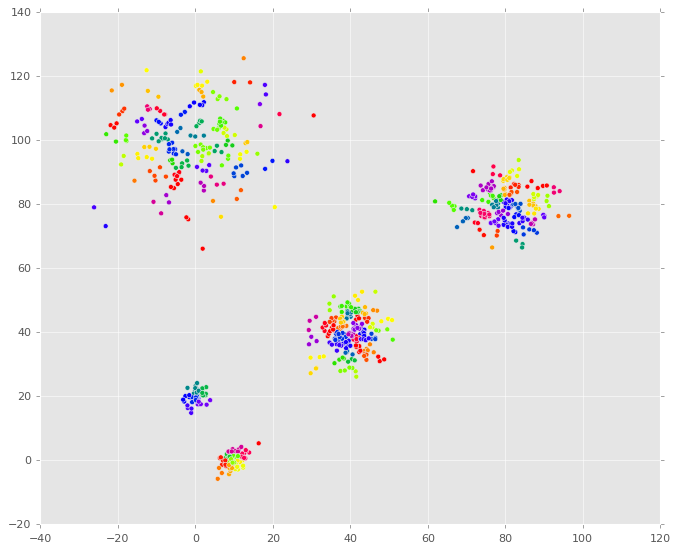

In [50]:
max_d = 170 
cluster = fcluster(z2,max_d,criterion="maxclust")
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0],x2[:,1],c = cluster,cmap="prism")
plt.show()

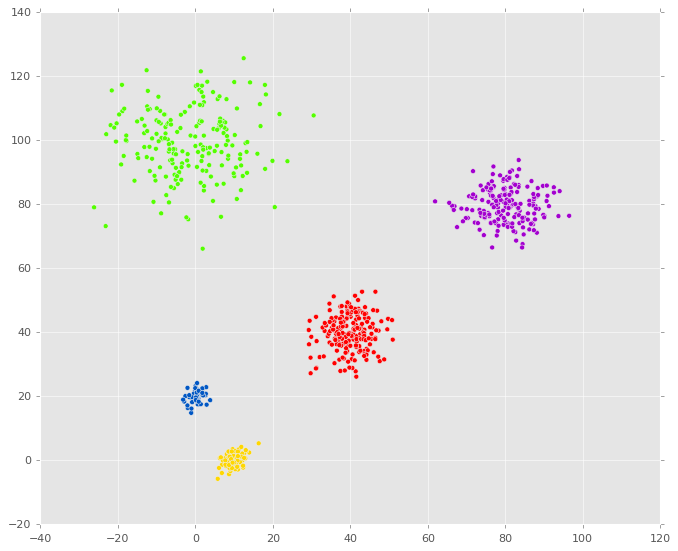

In [51]:
max_d = 170 
cluster = fcluster(z2,max_d,criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0],x2[:,1],c = cluster,cmap="prism")
plt.show()